In [1]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_github


In [2]:
import os
import pandas as pd
import yaml
from collections import defaultdict
from os.path import join

In [3]:
# evaluations = defaultdict(list)
evaluations = {}

In [4]:
evaluations['5Zebrafish_nocover_22min'] = [
    { 
        'exp_name': 'idtracker_nogaps',
        'evaluation':  'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation_nogaps.csv'
    },
    { 
        'exp_name': 'idtracker',
        'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation.csv',
    },
    { 
        'exp_name': 'toxtrac',
        'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/__toxtrac/evaluation.csv',
    },
    { 
        'exp_name': '180427_vaib',
        'evaluation': 'experiments/tracking/5Zebrafish_nocover_22min/180427_vaib/evaluation.csv'
    },
    { 
        'exp_name': '180626',
        'evaluation': '../projects/regression/zebrafish_new/evaluation.csv'
    },    
]

evaluations['Cam1_clip'] = [
    { 
        'exp_name': 'idtracker',
        'evaluation': 'experiments/tracking/Cam1_clip/__idtracker/evaluation.csv',
    },
    { 
        'exp_name': 'idtracker_nogaps',
        'evaluation': 'experiments/tracking/Cam1_clip/__idtracker/evaluation_nogaps.csv',
    },        
    { 
        'exp_name': 'toxtrac',
        'evaluation': 'experiments/tracking/Cam1_clip/__toxtrac/evaluation.csv',
    },        
    { 
        'exp_name': 'toxtrac_tight_segmentation',
        'evaluation': 'experiments/tracking/Cam1_clip/__toxtrac_better_thresh/evaluation.csv',
    },          
    { 
        'exp_name': '180427_vaib',
        'evaluation': '../projects/regression/zebrafish_new/evaluation.csv'
    },      
    { 
        'exp_name': '180704',
        'evaluation': '/home/matej/prace/ferda/projects/regression/cam1_clip_new/evaluation.csv',
    },
]

evaluations['Sowbug3_cut'] = [
    { 
        'exp_name': 'idtracker',
        'evaluation': 'experiments/tracking/Sowbug3_cut/__idtracker/evaluation.csv',
    },
    { 
        'exp_name': 'idtracker_nogaps',
        'evaluation': 'experiments/tracking/Sowbug3_cut/__idtracker/evaluation_nogaps.csv',
    },        
    { 
        'exp_name': 'toxtrac',
        'evaluation': 'experiments/tracking/Sowbug3_cut/__toxtrac/evaluation.csv',
    },            
    { 
        'exp_name': '180626',
        'evaluation': '../projects/regression/Sowbug3_cut_min1_new/evaluation.csv',
    },
#    '180427_vaib': 'experiments/tracking/Sowbug3_cut/180427_vaib/evaluation.csv',    
]

evaluations['Camera3-5min'] = [
    { 
        'exp_name': 'idtracker',
        'evaluation': 'experiments/tracking/Camera3-5min/__idtracker/evaluation.csv',
    },
    { 
        'exp_name': 'idtracker_nogaps',
        'evaluation': 'experiments/tracking/Camera3-5min/__idtracker/evaluation_nogaps.csv',
    },        
    { 
        'exp_name': 'toxtrac',
        'evaluation': 'experiments/tracking/Camera3-5min/__toxtrac/evaluation.csv',
    },            
    { 
        'exp_name': '180427_vaib',
        'evaluation': 'experiments/tracking/Camera3-5min/180427_vaib/evaluation.csv',
    },
]


In [5]:
with open('experiments.yaml', 'r') as fr:
    experiments = yaml.load(fr)

In [6]:
for directory, dirnames, filenames in os.walk(experiments['dir']):
    if directory == experiments['dir']:
        continue
    
    if ('experiment.yaml' in filenames) and ('evaluation.csv' in filenames):       
        with open(join(directory, 'experiment.yaml'), 'r') as fr:
            experiment_config = yaml.load(fr)
        
        experiment_config['evaluation'] = join(directory, 'evaluation.csv')
        evaluations[experiment_config['dataset_name']].append(experiment_config)
    else:
        print('no experiment.yaml and/or evaluation.csv in {}'.format(directory))

no experiment.yaml and/or evaluation.csv in ../experiments_tracking/180711_1110_Sowbug3_cut_test
no experiment.yaml and/or evaluation.csv in ../experiments_tracking/180711_1140_5Zebrafish_nocover_22min_test


Cam1_clip


,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.605956,0.606024,0.605889,0.608370,0.608506,6,1,5,0,10568,10574,18,259,0.216296,63.196044
idtracker_nogaps,0.899656,0.899756,0.899556,0.899815,0.900015,6,6,0,0,2699,2705,2,35,0.799778,133.556985
toxtrac,0.097106,0.161196,0.069481,0.431037,1.000000,6,0,6,0,0,15362,167,166,0.424852,133.370349
toxtrac_tight_segmentation,0.652834,0.953204,0.496407,0.520778,1.000000,6,0,6,0,0,12939,13,122,0.520296,195.002656
180427_vaib,0.439188,0.402589,0.483107,0.916493,0.763744,5,5,0,0,21263,6263,377,758,0.627960,133.919790
180704,0.637370,0.637370,0.637370,0.719222,0.719222,6,2,4,0,7581,7581,49,387,0.436630,138.438813


Sowbug3_cut


,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.703321,0.878017,0.586605,0.597802,0.894777,5,0,5,0,2367,13542,4,41,0.527383,151.559629
idtracker_nogaps,0.787323,0.982885,0.656668,0.667865,0.999644,5,0,5,0,8,11183,4,2,0.667508,146.714984
toxtrac,0.707434,0.992544,0.549569,0.553698,1.000000,5,0,5,0,0,15027,2,18,0.553638,64.270609
180626,0.557358,0.695799,0.464865,0.598248,0.895443,5,0,5,0,2352,13527,5,33,0.528245,41.815123
test,0.046504,0.541722,0.024295,0.027324,0.609272,5,0,0,5,590,32750,0,31,0.009801,664.247062


Camera3-5min


,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker,0.891944,0.892043,0.891844,0.895978,0.896177,10,10,0,0,4671,4681,14,247,0.791867,13.781312
idtracker_nogaps,0.996689,0.996799,0.996578,0.996578,0.996799,10,10,0,0,144,154,0,5,0.993378,39.111585
toxtrac,0.643172,0.745830,0.565356,0.758000,0.999971,10,5,5,0,1,10890,108,210,0.755578,41.122685
180427_vaib,0.897800,0.897800,0.897800,0.898378,0.898378,10,10,0,0,4573,4573,10,386,0.796533,4.154986


5Zebrafish_nocover_22min


,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
idtracker_nogaps,0.930458,0.930489,0.930427,0.947533,0.947597,5,5,0,0,3930,3935,132,234,0.893373,264.281000
idtracker,0.799507,0.799533,0.799480,0.813533,0.813588,5,4,1,0,13980,13985,160,895,0.625000,75.908890
toxtrac,0.925810,0.999985,0.861880,0.861880,0.999985,5,5,0,0,1,10359,0,311,0.861867,34.326583
180427_vaib,0.881635,0.881723,0.881547,0.882253,0.882430,5,5,0,0,8816,8831,29,987,0.764320,181.964081
180626,0.439188,0.402589,0.483107,0.916493,0.763744,5,5,0,0,21263,6263,377,758,0.627960,133.919790


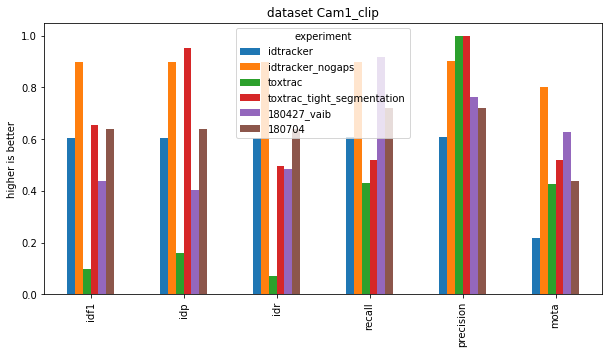

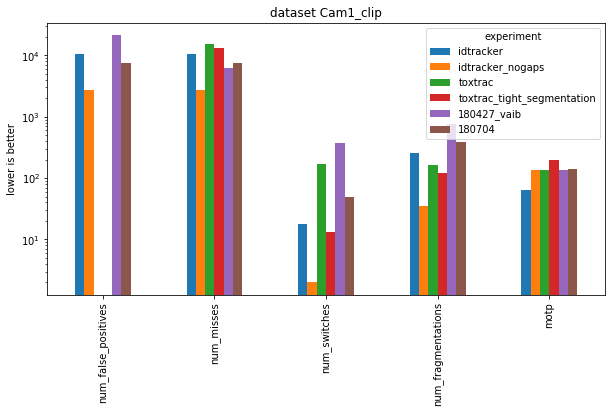

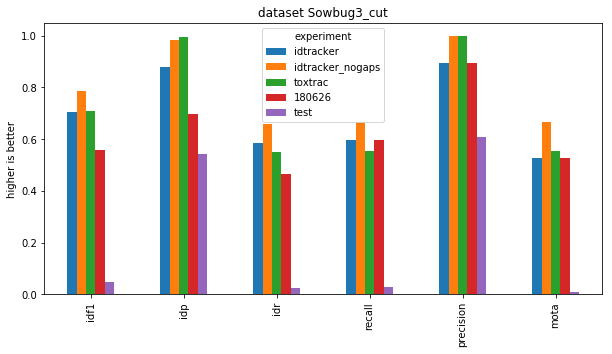

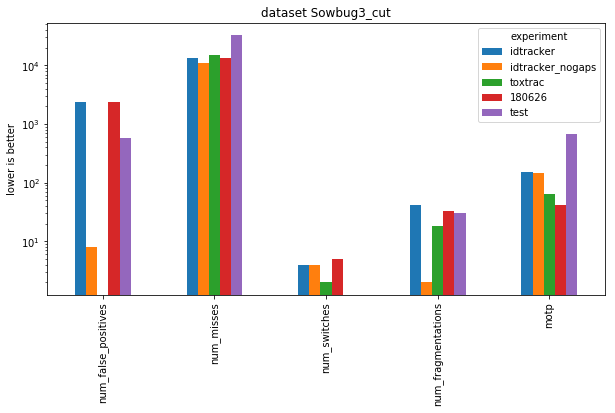

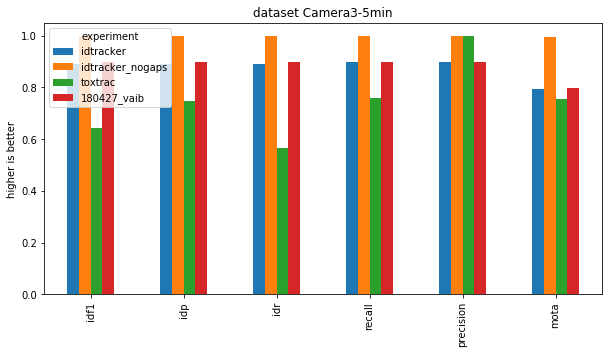

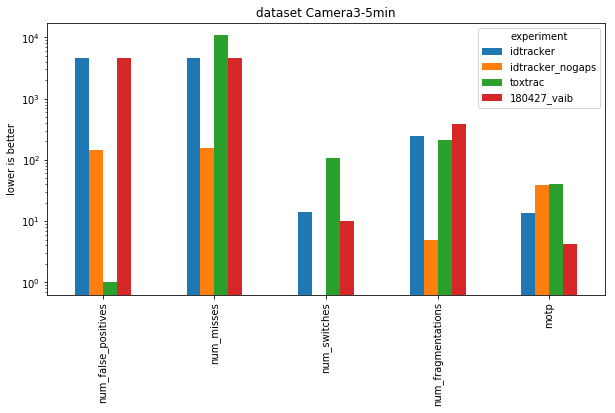

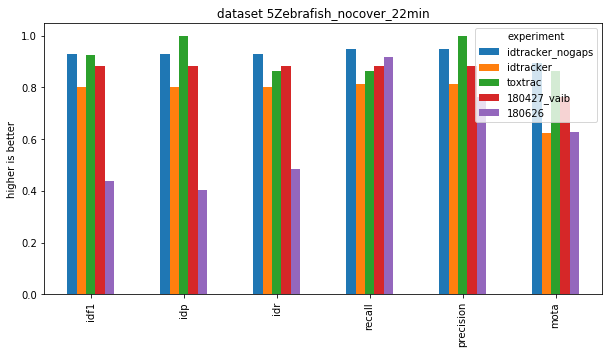

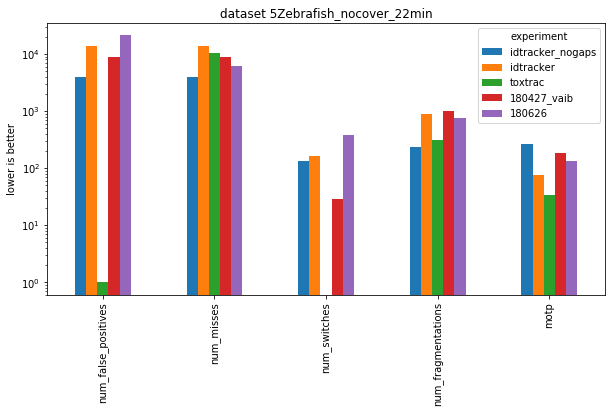

In [7]:
for dataset, dataset_experiments in evaluations.items(): 
    all_evals = []
    for experiment in dataset_experiments:
        df = pd.read_csv(experiment['evaluation'])
        df.insert(0, 'experiment', experiment['exp_name'])
        all_evals.append(df)
    df = pd.concat(all_evals).set_index('experiment')
    
    df.name = dataset
    print(df.name)
    display(df)
    # df.to_csv('{}_comparison.csv'.format(dataset_name))
    ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5), title='dataset ' + dataset)
    _ = ax.set_ylabel('higher is better')
#    display(ax)
    ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True, title='dataset ' + dataset)
    _ = ax.set_ylabel('lower is better')
#    display(ax)    